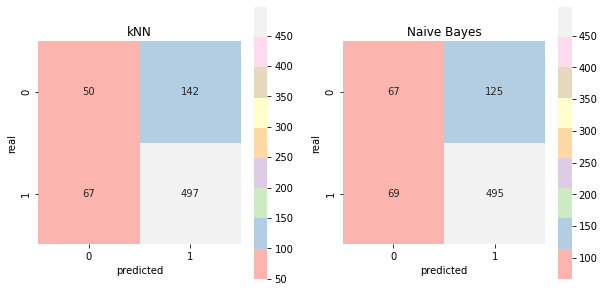

kNN accuracy: 0.72 ± 0.03
Naive Bayes accuracy: 0.74 ± 0.04
knn accuracy > nb accuracy?
p-value =  0.9104476998751558
knn accuracy < nb accuracy?
p-value =  0.08955230012484414
Naive Bayes is statistically superior to kNN regarding accuracy with statistical significance under a confidence threshold of 0.1 since 0.08955230012484414 < 0.1.


In [8]:
"""Using sklearn, considering a 10-fold stratified cross validation (random=0), plot the cumulative
testing confusion matrices of 𝑘NN (uniform weights, 𝑘 = 5, Euclidean distance) and Naïve Bayes
(Gaussian assumption). Use all remaining classifier parameters as default.
Using scipy, test the hypothesis “𝑘NN is statistically superior to Naïve Bayes regarding
accuracy”, asserting whether is true."""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy import stats

data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
y = df['class']
X = df.drop('class', axis=1)

folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
nb = GaussianNB()

cm_knn = np.zeros((2, 2))
cm_nb = np.zeros((2, 2))

for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]

    knn.fit(X_train, y_train)
    nb.fit(X_train, y_train)

    knn_y_pred = knn.predict(X_test)
    nb_y_pred = nb.predict(X_test)

    cm_knn += confusion_matrix(y_test, knn_y_pred)
    cm_nb += confusion_matrix(y_test, nb_y_pred)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

confusion_1 = pd.DataFrame(np.array(cm_knn))
sns.heatmap(confusion_1, annot=True, fmt='g', cmap="Pastel1", ax=ax[0])
ax[0].imshow(cm_knn)
ax[0].set_title('kNN')
ax[0].set(xlabel='predicted', ylabel='real')
plt.xlabel('Predicted')
plt.ylabel('Real')

confusion_2 = pd.DataFrame(np.array(cm_nb))
sns.heatmap(confusion_2, annot=True, fmt='g', cmap="Pastel1",ax=ax[1])
ax[1].imshow(cm_nb)
ax[1].set_title('Naive Bayes')
ax[1].set(xlabel='predicted', ylabel='real')

plt.show()

pred_1 = cross_val_score(knn, X, y, cv=folds, scoring='accuracy')
pred_2 = cross_val_score(nb, X, y, cv=folds, scoring='accuracy')
print("kNN accuracy:", round(np.mean(pred_1),2), "±", round(np.std(pred_1), 2))
print("Naive Bayes accuracy:", round(np.mean(pred_2),2), "±", round(np.std(pred_2), 2))
res = stats.ttest_rel(pred_1, pred_2, alternative='greater')
print("knn accuracy > nb accuracy?\np-value = ", res.pvalue)
res = stats.ttest_rel(pred_1, pred_2, alternative='less')
print("knn accuracy < nb accuracy?\np-value = ", res.pvalue)

if res.pvalue < 0.1:
    print("Naive Bayes is statistically superior to kNN regarding accuracy with statistical significance under a confidence threshold of 0.1 since",res.pvalue,"< 0.1.")
elif 1-res.pvalue < 0.1:
    print("kNN is statistically superior to Naive Bayes regarding accuracy with statistical significance under a confidence threshold of 0.1 since",1-res.pvalue,"< 0.1.")

